# ***Review of supervised learning**
- **지도학습(supervised learning)**
    - **입력변수 X에 대한, 출력변수 Y가 존재**
    - **Y에 따라 회귀(regression), 분류(classification)**

##### **Y가 continuous variable인 경우 회귀(regression)**
<img src="../image/regression.png">

##### **Y가 categorical variable인 경우 분류(classification)**
<img src="../image/classification.png">

# **-------------------------------------------------------------------------------------------------**

# **1.군집화 (Clustering)**
- **비지도학습(unsupervised learning)으로, Y값이 없는 상황에서 사용**
- **특정 기준을 기반으로 데이터 포인트를 그룹화**

<img src="../image/clustering.png">

# **2.데이터 유형에 따른 군집화**
- **데이터의 형태, 분포, 구조에 따라 군집화 알고리즘의 성능이 상이함**

- **1.Circles(원형) 데이터**
- **(example) : Wi-Fi 신호의 등고선 분포**

    - **추천 알고리즘 : DBSCAN**
        - **이유 : DBSCAN이 비선형 구조의 경계를 탐지할 수 있음**

- **2.Moons(비선형) 데이터**
- **(example) : 강이나 도로의 흐름과 같은 비선형 경계를 가진 환경 데이터**

    - **추천 알고리즘 : DBSCAN**
        - **이유 : DBSCAN이 비선형 경계를 따라 초승달 형태의 구조를 잘 분리할 수 있음**
        

- **3.Blobs(구형) 데이터**
- **(example) : 고객의 소비 패턴 데이터**

    - **추천 알고리즘 : (1)K-means, (2)hierarchical-clustering**
        - **이유 : (1)Blobs 데이터는 대부분 정규 분포 기반의 군집으로 형성되는데, 이는  K-means가 전제하는 구형군집 구조에 부합**
        - **이유 : (2)Blobs 형태의 데이터는 계층적 구조를 시각화하기 적합**
        

- **4.no structures(구조가 없는) 데이터**
- **(example) : 서버 로그 내 이상 데이터 및 센서 오류 데이터와 같은 랜덤 노이즈 데이터**

    - **추천 알고리즘 : DBSCAN**
        - **이유 : No Structure 데이터는 군집의 형태나 분포가 명확하지 않은데, DBSCAN은 구조가 없는 데이터에서도 밀도가 높은 부분을 찾아 유용한 결과를 도출할 수 있음**

In [12]:
#) 필요한 라이브러리 임포트
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 군집화 패키지
from sklearn import datasets
from sklearn import cluster

In [13]:
#) 2차원 평면공간에서, 주어진 dataset에 대한 산점도를 시각화하는 함수

def plot_data(dataset, position, title):
    X, y = dataset  # 2차원 배열로 X는 데이터 포인트에 대한 튜플, y는 label
    plt.subplot(position)  # 매개변수 position 자리에 오는 argument의 위치에 subplot을 그림
    plt.title(title)  # plot의 제목을 매개변수 title 자리에 오는 argument로 설정
    plt.scatter(X[:, 0], X[:, 1])  # 2개의 X변수를 사용하여 산점도를 시각화

In [14]:
#) 랜덤 데이터 생성

# 무작위로 난수를 생성
np.random.seed(0)

# 각 데이터셋에 사용할 데이터 포인트의 수 설정
n_samples = 1500

# 데이터셋에 추가할 노이즈의 정도를 설정
noise = 0.05

# 데이터 생성 시, 무작위성을 일정하게 유지하기 위한 설정
random_state = 0

In [15]:
#) 다양한 형태의 데이터

circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
# factor는 내부와 외부 원의 크기 비율을 설정하는 파라미터

moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

no_structures = np.random.rand(n_samples, 2), None
# 데이터가 2차원 평면에 생성

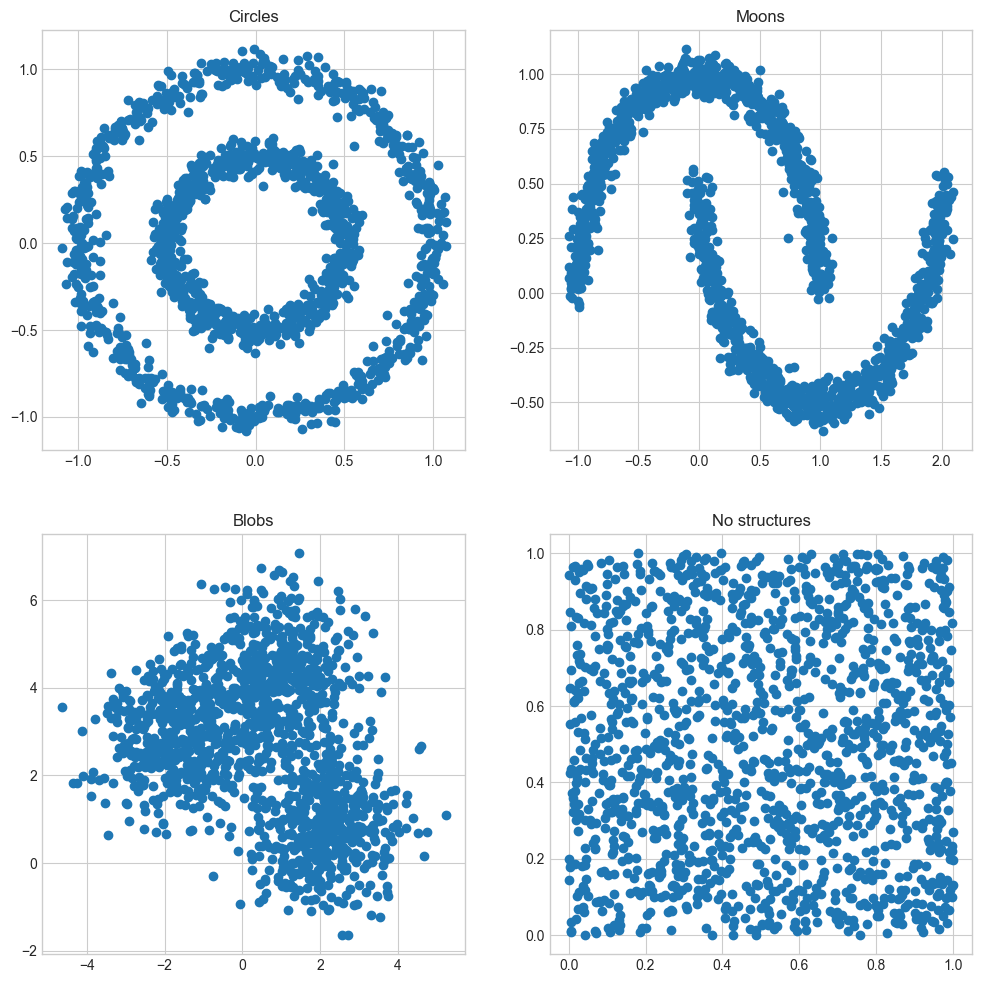

In [16]:
#) 결과 시각화

plt.figure(figsize=(12, 12))
plot_data(circles, 221, "Circles")
plot_data(moons, 222, "Moons")
plot_data(blobs, 223, "Blobs")
plot_data(no_structures, 224, "No structures")

# **3.다양한 군집화 알고리즘**
- **다양한 형태의 데이터에 K-means 군집화, hierarchical-clustering, DBSCAN 등의 군집화 알고리즘을 적용**

In [17]:
# argument에 주어진 모델을 사용하여 데이터셋에 대해 군집화를 수행하는 함수
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)  # 모델을 사용하여 데이터 X에 대해 학습을 수행
    if hasattr(model, "labels_"):  # 모델이 labels_ 속성을 가지고 있는지 확인
        labels = model.labels_.astype(int)
    else:
        labels = model.predict(X)

    colors = np.array(
        [
            "#30A9DE",
            "#E53A40",
            "#090707",
            "#A593E0",
            "#F6B352",
            "#519D9E",
            "#D81159",
            "#8CD790",
            "#353866",
        ]
    )
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

##### **(1)K-means 군집화**

c:\Users\JeongJongMin\anaconda3\envs\clustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JeongJongMin\anaconda3\envs\clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JeongJongMin\anaconda3\envs\clustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JeongJongMin\anaconda3\envs\clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

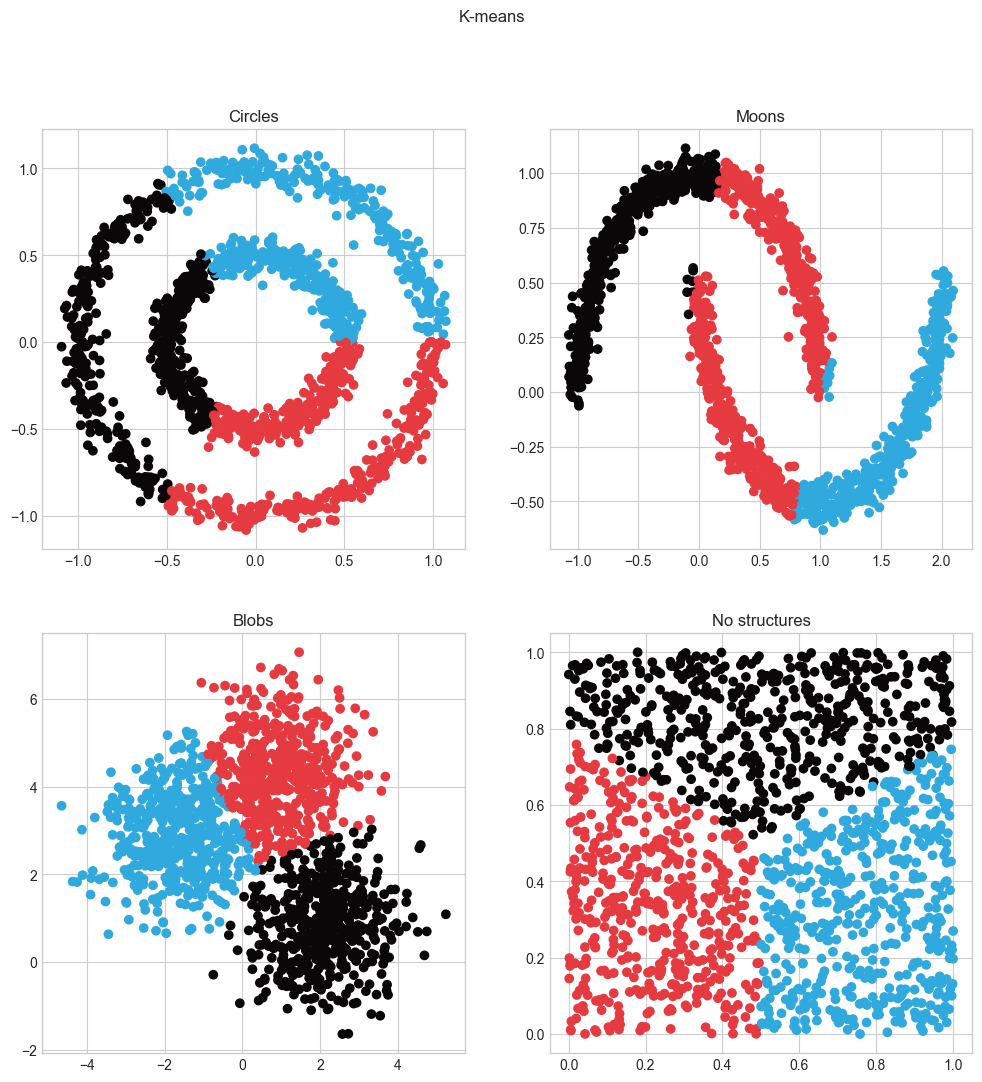

In [23]:
# k = 3로 설정한 경우
fig = plt.figure(figsize=(12, 12))
fig.suptitle("K-means")

fit_predict_plot(
    cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, "Circles"
)
fit_predict_plot(
    cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, "Moons"
)
fit_predict_plot(
    cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, "Blobs"
)
fit_predict_plot(
    cluster.KMeans(n_clusters=3, random_state=random_state),
    no_structures,
    224,
    "No structures",
)

##### **(2)Hierarchical-clustering**

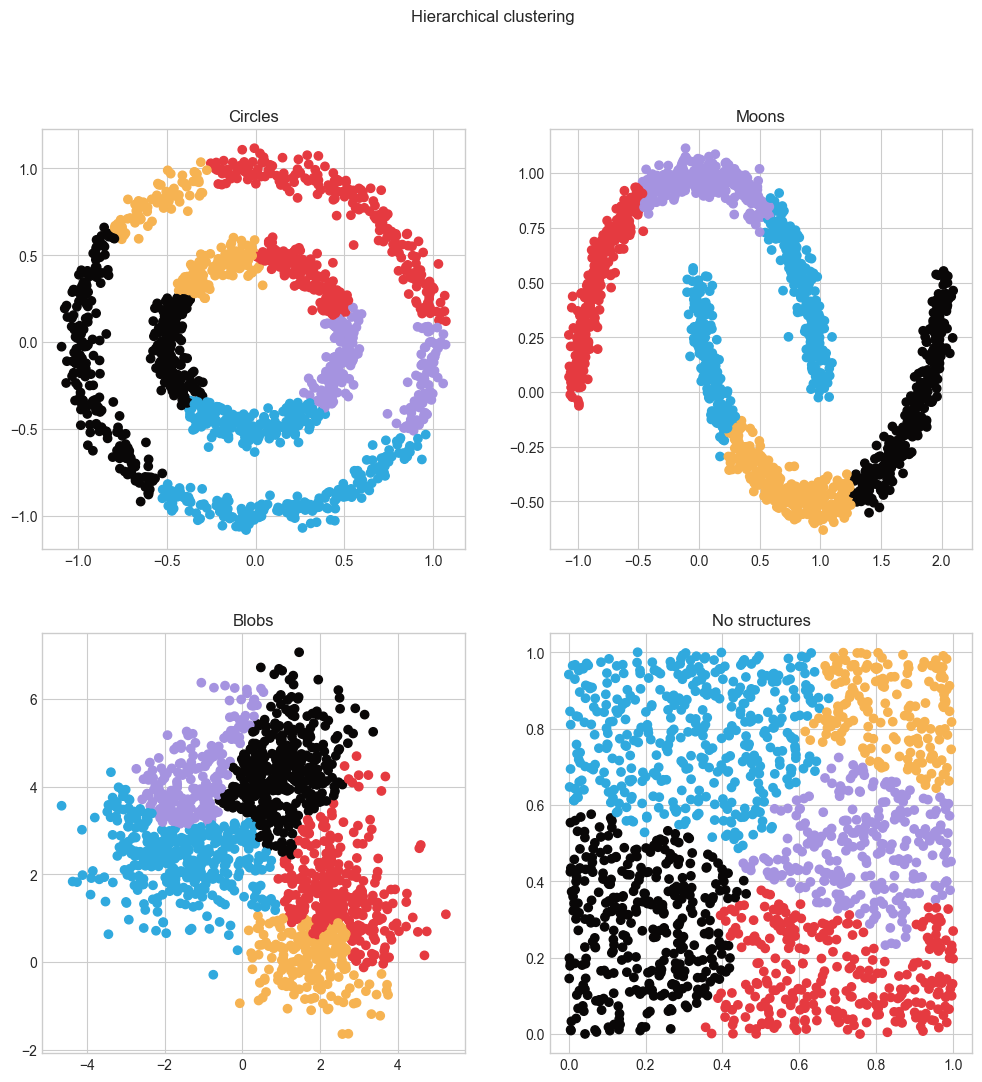

In [24]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle("Hierarchical clustering")

fit_predict_plot(
    cluster.AgglomerativeClustering(n_clusters=5, linkage="ward"),
    circles,
    221,
    "Circles",
)
fit_predict_plot(
    cluster.AgglomerativeClustering(n_clusters=5, linkage="ward"), moons, 222, "Moons"
)
fit_predict_plot(
    cluster.AgglomerativeClustering(n_clusters=5, linkage="ward"), blobs, 223, "Blobs"
)
fit_predict_plot(
    cluster.AgglomerativeClustering(n_clusters=5, linkage="ward"),
    no_structures,
    224,
    "No structures",
)

##### **(3)DBSCAN**

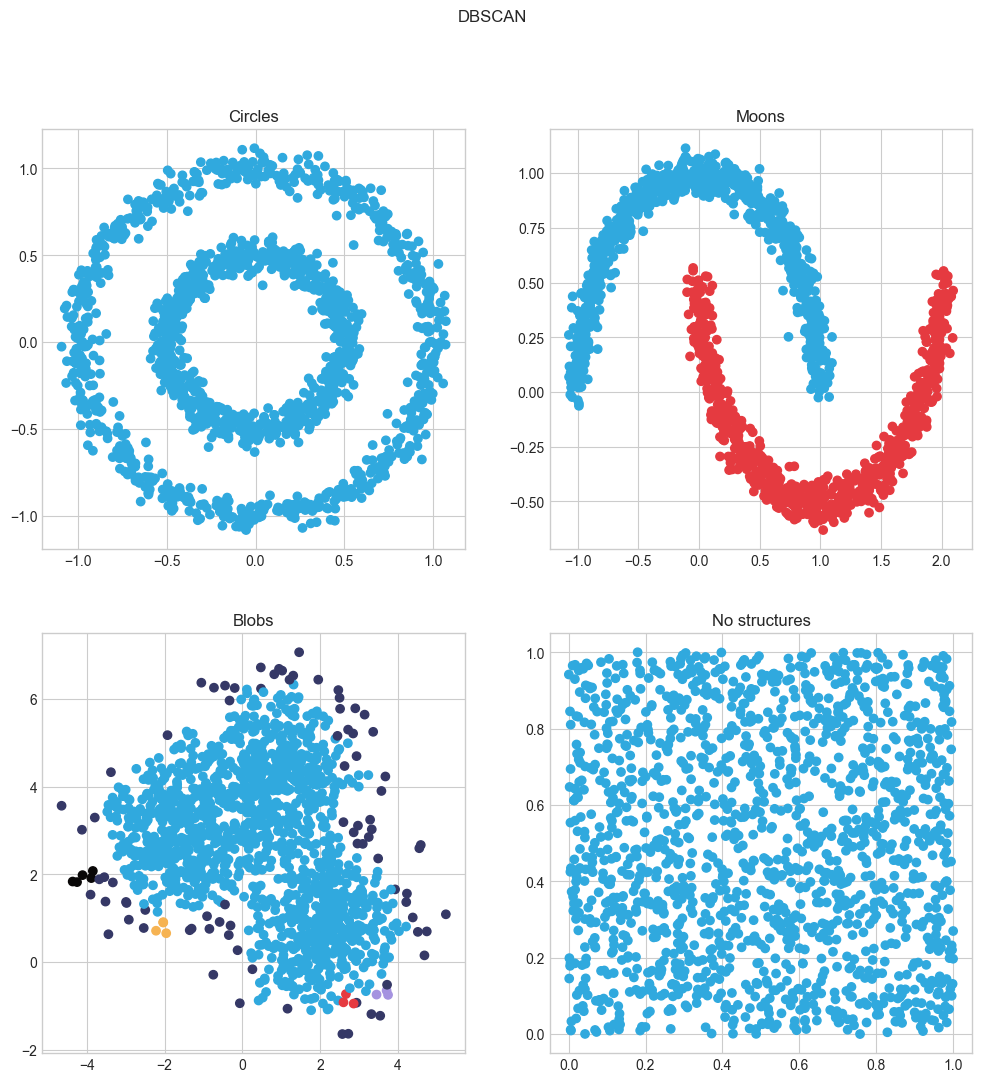

In [21]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle("DBSCAN")

fit_predict_plot(
    cluster.DBSCAN(eps=0.3), circles, 221, "Circles"
)  # eps(입실론) : 각 데이터 포인트 주변의 반경을 정의하는 파라미터
fit_predict_plot(cluster.DBSCAN(eps=0.3), moons, 222, "Moons")
fit_predict_plot(cluster.DBSCAN(eps=0.3), blobs, 223, "Blobs")
fit_predict_plot(cluster.DBSCAN(eps=0.3), no_structures, 224, "No structures")